## Presenting CPM results


In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from test_cpm import train_cpm, run_validate
from scipy.stats import pearsonr

In [2]:
## AAL atlas
first = np.load('/home/or/kpe_task_analysis/trauma_ses1.npy')
second = np.load('/home/or/kpe_task_analysis/trauma_ses2.npy')
delta = np.subtract(second, first)

y = np.array([2,  -1,  30,  17,  28,   4,  30,  18,  22,  18,  -1,  11,   2,   4, -16,  32,   8,  14,  20,   3,  23])

cpm1_Rpos , cpm1_Rneg,behav_pred_pos, behav_pred_neg  = run_validate(delta, y, 'LOO')

Running LOO, sub no: 0
Running LOO, sub no: 1
Running LOO, sub no: 2
Running LOO, sub no: 3
Running LOO, sub no: 4
Running LOO, sub no: 5
Running LOO, sub no: 6
Running LOO, sub no: 7
Running LOO, sub no: 8
Running LOO, sub no: 9
Running LOO, sub no: 10
Running LOO, sub no: 11
Running LOO, sub no: 12
Running LOO, sub no: 13
Running LOO, sub no: 14
Running LOO, sub no: 15
Running LOO, sub no: 16
Running LOO, sub no: 17
Running LOO, sub no: 18
Running LOO, sub no: 19
Running LOO, sub no: 20


/home/or/miniconda3/envs/neuroAnalysis/lib/python3.7/site-packages/scipy/stats/stats.py:3399: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/or/kpe_task_analysis/general_connectivity_analysis/test_cpm.py:58: RuntimeWarning: invalid value encountered in greater
  posedges=(rmat > 0) & (pmat < 0.01)
/home/or/kpe_task_analysis/general_connectivity_analysis/test_cpm.py:58: RuntimeWarning: invalid value encountered in less
  posedges=(rmat > 0) & (pmat < 0.01)
/home/or/kpe_task_analysis/general_connectivity_analysis/test_cpm.py:60: RuntimeWarning: invalid value encountered in less
  negedges=(rmat < 0) & (pmat < 0.01)


In [ ]:
# Shen Atlas
first_shen = np.load('/home/or/kpe_task_analysis/trauma_ses1_shen.npy')
second_shen = np.load('/home/or/kpe_task_analysis/trauma_ses2_shen.npy')
delta_shen = np.subtract(second_shen, first_shen)

cpm1_Rpos_s , cpm1_Rneg_s, behav_pred_pos_s, behav_pred_neg_s  = run_validate(delta_shen, y, 'LOO')

In [3]:
# Correlation between positive edges prediction and actual score (LOO method) is
cpm1_Rpos

(0.41742535915275286, 0.059734204550888806)

In [4]:
# Correlation between negative edges prediction and actual score (LOO method) is
cpm1_Rneg

(0.2450205733783462, 0.2843959298331512)

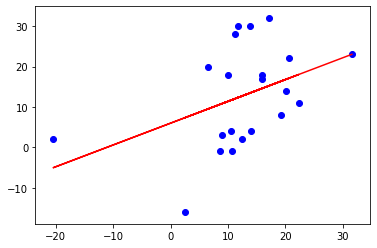

In [5]:
# fitting regression line
fit_pos=np.polyfit(behav_pred_pos,y,1)
fit_pos
# plot
#fig, ax = plt.subplots()
line = behav_pred_pos*fit_pos[0]+ fit_pos[1]
plt.plot(behav_pred_pos, line, 'r')
plt.scatter(behav_pred_pos, y, c='blue')


[Text(0, 0.5, 'Observed score'),
 Text(0.5, 0, 'Predicted score'),
 Text(0.5, 1.0, 'Predicted vs Observed after CPM')]

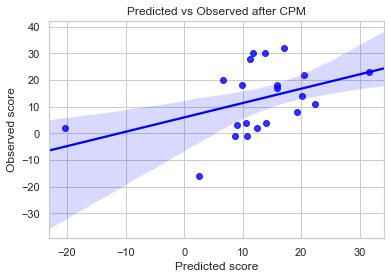

In [8]:
import seaborn as sns; #sns.set(color_codes=True)
sns.set_style("whitegrid")

ax = sns.regplot(x=behav_pred_pos, y=y, ci=90, color = 'blue', )
ax.set(xlabel='Predicted score', ylabel='Observed score', title='Predicted vs Observed after CPM')
#sns.regplot(x=behav_pred_neg, y=y)
#plt.scatter(behav_pred_pos, y)
#plt.scatter(behav_pred_neg, y)

In [ ]:
# Using Shen's parcellation we get bad results


In [ ]:
import matplotlib.lines as mlines
fig, ax = plt.subplots()
ax.scatter(behav_pred_pos, y, c='blue')
line = mlines.Line2D([0, 1], corr_pos, color='red')